In [15]:
# Loading the csv file into dataframe

import pandas as pd

df = pd.read_csv("Fraud.csv")
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# Doing some analysis to find errors in the data

In [3]:
# Checking if there is null values or not

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## (From the above analysis it clear that there are no  null or empty values in data)

# Now let us identify the types of data present in the data

In [4]:
# Checking for the columns which are not int/float

df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

## So, there are some columns which are of object types, let us identify them 

In [5]:
#  Checking unique values for object type columns

for i in df:
    if df[i].dtypes == "object":
        print("{}: {}".format(i, df[i].unique()))

type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig: ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest: ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


# Now let us perform some analysis

### 1. Checking the frequncy of fraud by transaction types

In [18]:
txtypes= df["type"].unique()
fraud_count = []

for i in txtypes:
    fraud = df[(df["type"] == i) & (df["isFraud"] == 1)]
    fraud_count.append(len(fraud))
print(txtypes)
print(fraud_count)

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
[0, 4097, 4116, 0, 0]


### We Found that there are 4097 and 4116 frauds on Transfer and Cash out type of transactions repectevily

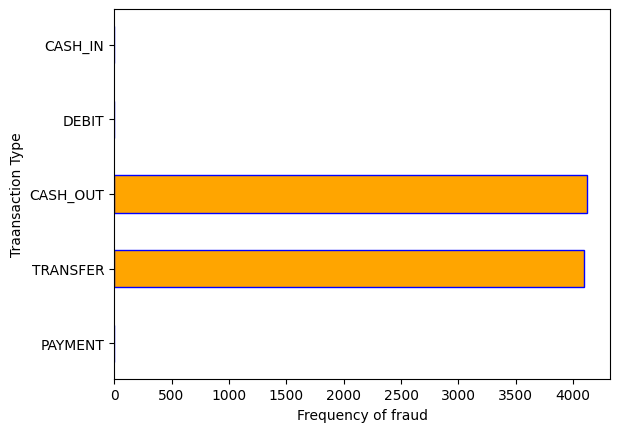

In [53]:
# Till now data is pretty much clean, now lets perform visualization for data analysis

import matplotlib.pyplot as plt

plt.barh(txtypes, fraud_count, height = 0.5, color = "orange", edgecolor = "blue")
plt.ylabel("Traansaction Type")
plt.xlabel("Frequency of fraud")
plt.show()

### 2. Checking how many tranactions are fraud

In [75]:
print("Total no. of frauds are:", len(df[df["isFraud"] == 1]))

Total no. of frauds are: 8213


### 3. Getting percentage of fraud on some specific range of transactions

[1.2908204481801522, 12.908204481801521, 32.270511204503805, 64.54102240900761]

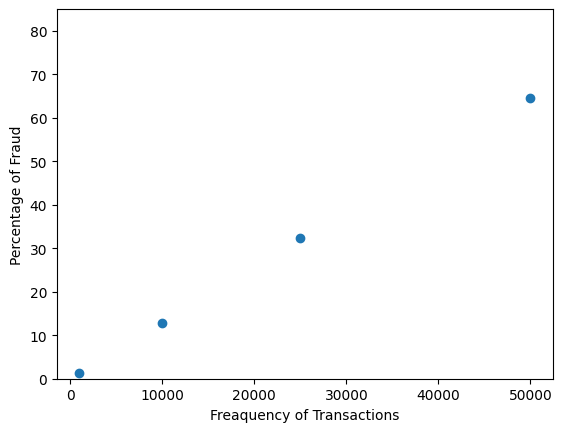

In [111]:
print()
rangetxt = [1000, 10000, 25000, 50000]
perc = []
for i in rangetxt:
    perc.append(len(df[df["isFraud"] == 1]) / len(df) * i)
plt.ylim(0, 85)
plt.ylabel("Percentage of Fraud")
plt.xlabel("Freaquency of Transactions")
plt.scatter(rangetxt, perc)
perc


### 3. Checking the transaction amounts for each type

<Axes: xlabel='type'>

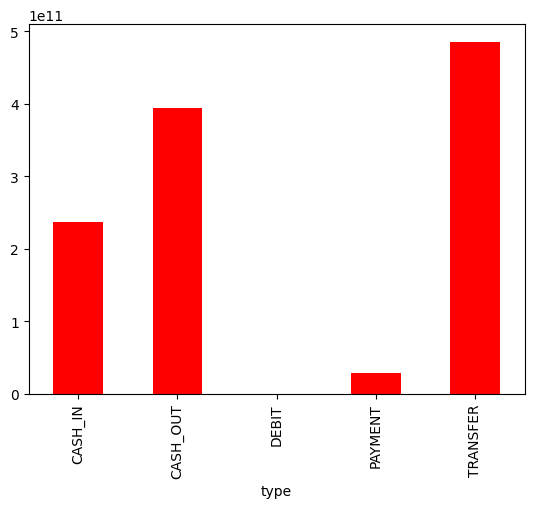

In [118]:
plt.xlabel("Amount of Transactions")
df.groupby('type').amount.sum().plot(kind='bar', color = "red")


## Making seperate dataframes for fraud and non fraud transactions for advance analysis

In [77]:
# Making a separate dataframes of for transaction which fraud and not fraud

fraud_df = df[df["isFraud"] == 1]
nonfraud_df = df[df["isFraud"] == 0]
fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


### 4. Checking for the frequncy of fraud by amount

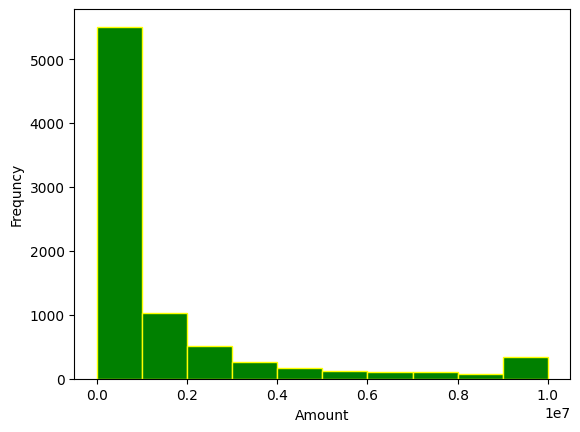

In [105]:
# Checking for the frequncy of fraud by amount

plt.hist(fraud_df["amount"], color = "green", edgecolor='yellow')
plt.xlabel("Amount")
plt.ylabel("Frequncy")
plt.show()

### By above analysis we can say that, for smaller transcation amount the rate of fraud is high

### 4. Checking for the frequncy of fraud by time after transactions

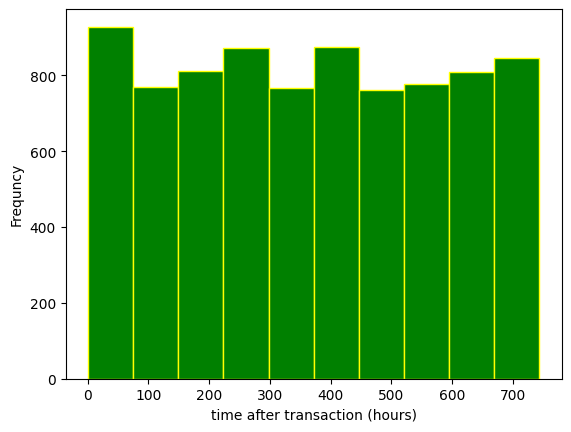

In [106]:
plt.hist(fraud_df["step"], color = "green", edgecolor='yellow')
plt.xlabel("time after transaction (hours)")
plt.ylabel("Frequncy")
plt.show()

### 5. Checking the accuracy of the flags for fraud

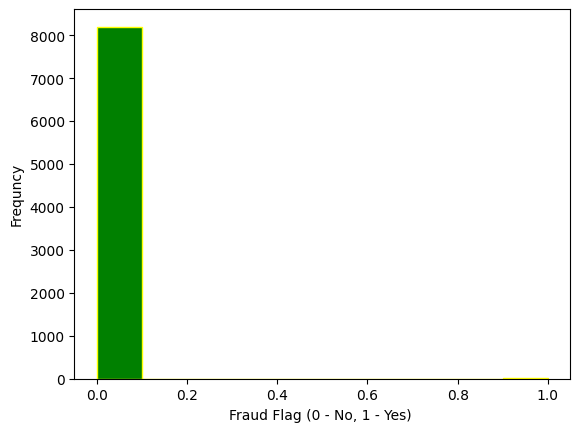

8213

In [122]:
# Checking the accuracy of the flags for fraud

plt.hist(fraud_df["isFlaggedFraud"], color = "green", edgecolor='yellow')

plt.xlabel("Fraud Flag (0 - No, 1 - Yes) ")
plt.ylabel("Frequncy")
plt.show()
len(fraud_df)

### From the above analysis we can say that isfraud accuracy is very low

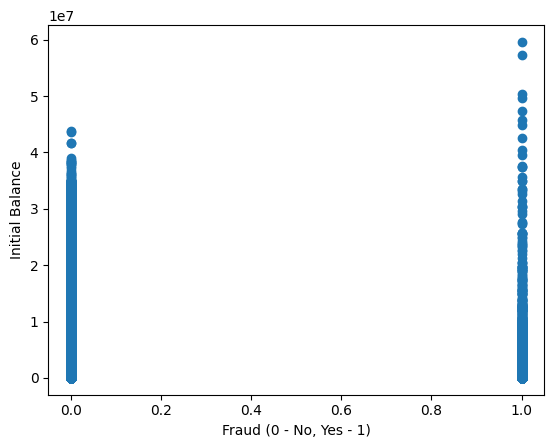

In [133]:
plt.scatter(df["isFraud"], df["oldbalanceOrg"])
plt.xlabel("Fraud (0 - No, Yes - 1)")
plt.ylabel("Initial Balance")
plt.show()

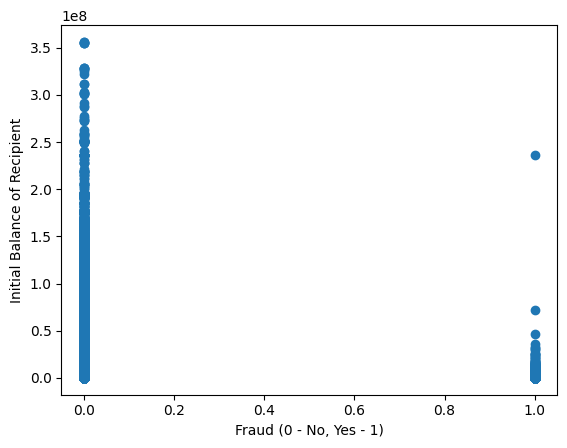

In [136]:
plt.scatter(df["isFraud"], df["oldbalanceDest"])
plt.xlabel("Fraud (0 - No, Yes - 1)")
plt.ylabel("Initial Balance of Recipient")
plt.show()

### Handling Text values

In [25]:
# Encoding payment types

df1 = pd.get_dummies(data = df, columns = ["type"], dtype = int)
df1

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


## Removing the columns which is having no impact in detecting the fraud

In [26]:
# Removing the columns which is having no impact in detecting the fraud

df1 = df1.drop(["isFlaggedFraud", "nameOrig", "nameDest"], axis = "columns")
df1.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_CASH_IN        int32
type_CASH_OUT       int32
type_DEBIT          int32
type_PAYMENT        int32
type_TRANSFER       int32
dtype: object

In [28]:
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [27]:
len(df1)

6362620

## Scaling the vlaues between 0 and 1

In [29]:
#  Scaling values between 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_be_scaled = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

df1[cols_to_be_scaled] = scaler.fit_transform(df1[cols_to_be_scaled])

df1.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,0.000106,0.002855,0.003233,0.000000,0.0,0,0,0,0,1,0
1,1,0.000020,0.000357,0.000391,0.000000,0.0,0,0,0,0,1,0
2,1,0.000002,0.000003,0.000000,0.000000,0.0,1,0,0,0,0,1
3,1,0.000002,0.000003,0.000000,0.000059,0.0,1,0,1,0,0,0
4,1,0.000126,0.000697,0.000603,0.000000,0.0,0,0,0,0,1,0


## Making Training Data set and target data set

In [30]:
x = df1.drop(["isFraud"], axis = "columns")
y = df1["isFraud"]

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

## Making neural network model and measuring accuracy

In [32]:
import tensorflow as tf
import keras

model = keras.Sequential([
    keras.layers.Dense(len(x_train.columns), input_shape = [len(x_train.columns),], activation = "relu"),
    # keras.layers.Dense(5000, activation = "relu"),
    # keras.layers.Dense(2000, activation = "relu"),
    # keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 2)
loss, dl_score =  model.evaluate(x_test, y_test)

Epoch 1/2
178949/178949 [==============================] - 525s 3ms/step - loss: 0.0102 - accuracy: 0.9987
Epoch 2/2
19884/19884 [==============================] - 19s 971us/step - loss: 0.0074 - accuracy: 0.9987


## Checkinng the accuracies for machine learninng models

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

ml_models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]

scores = []

def get_scores():
    for i in ml_models:
        model = i
        print("Training " + str(i)[:-2] + " model...")
        model.fit(x_train, y_train)
        scores.append(model.score(x_test, y_test))
        # print(model.score())
        print("Done", i) 
        print()
get_scores()
        

Training DecisionTreeClassifier model...
Done DecisionTreeClassifier()

Training RandomForestClassifier model...
Done RandomForestClassifier()

Training LogisticRegression model...
Done LogisticRegression()



In [35]:
# Displaying accuracy scores for each model

scores_of_machine_learning_models = {}
for i, j in zip(ml_models, scores):
    scores_of_machine_learning_models[str(i)[:-2]] = j*100
scores_of_machine_learning_models

score_df = pd.DataFrame([scores_of_machine_learning_models], index=["Score"])
score_df["ANN"] = dl_score *100
score_df = score_df.T
score_df

,Score
DecisionTreeClassifier,99.968252
RandomForestClassifier,99.969667
LogisticRegression,99.865621
ANN,99.869233


## Choosing Model which got highest score 

In [38]:
# Choosing Machine Learning Model which has highest score

max_score_model = score_df.Score.idxmax() + "()"

def get_model():
    for i in ml_models:
        if str(i) == max_score_model:
            return i
final_model = get_model()
print("Highest Scored Model: ", final_model)


Highest Scored Model:  RandomForestClassifier()


In [45]:
x_train.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

# Detecting if transaction was fraud or not based on certain inputs

In [51]:
# Testing

inputs1 = [8, 45000, 46500, 1500, 0, 45000, 0, 0, 0, 0, 1]
inputs2 = [8, 45000, 46500, 1500, 500, 0, 0, 0, 1, 0, 0]

def check_fraud(input):
    if(final_model.predict([input]) == 1):
        return "Transaction found to be fraud Fraud!"
    else:
        return "Transaction didn't found Fraud."
        
print(check_fraud(inputs1))
print(check_fraud(inputs2))

Transaction found to be fraud Fraud!
Transaction didn't found Fraud.


C:\Users\prith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\prith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Q. What kind of prevention should be adopted while company update its infrastructure?

### Ans. Here are some points for fraud prevention during infrastructure updates:
### 1. Ensure all sensitive data is encrypted
### 2. Utilize real-time monitoring systems to detect unusual activities
### 3. Two Factor Authentication at time of transaction
### 4. Regular security testing


## Q. Assuming these actions have been implemented, how would you determine if they work?

### Fter implementing the above changes, here is how can i determine if they work:
### 1. If data is encrypted themn there is less chance of any third party or fraud person to interfere with transactons and customer details
### 2. If there will be real time monitoring for every transaction, we can stop the transaction or block frauder of transcation seems to be result in fraud
### 3. 2 factor authentication enable the custiomer to double ensure if the transaction is being started, the transaction will complete only after customer has completed 2 step authentication
### 4. Regular security testing will ensure that how the security systems are performing